In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns

In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path


'C:\\Users\\vaibh\\.keras\\datasets\\auto-mpg.data'

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
dataset.shape

(398, 8)

In [7]:
dataset=dataset.dropna()

In [8]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [9]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA


In [10]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


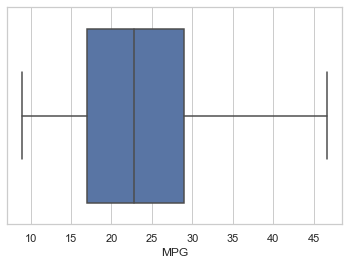

In [11]:
#boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(x=dataset["MPG"])

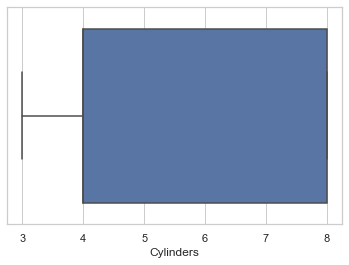

In [12]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dataset["Cylinders"])

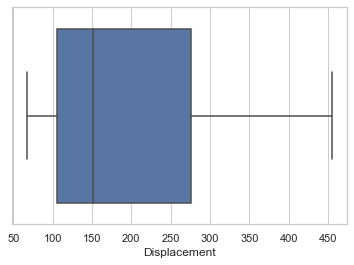

In [13]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dataset["Displacement"])

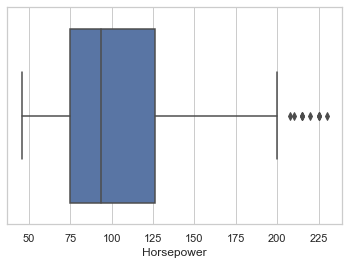

In [14]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dataset["Horsepower"])

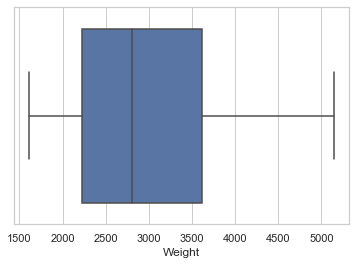

In [15]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dataset["Weight"])

In [16]:
X=dataset.drop(["MPG"],axis=1)
Y = dataset["MPG"]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1, random_state=42)

In [18]:
X_train.keys()

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(352, 9)
(40, 9)
(352,)
(40,)


In [20]:
import seaborn as sns

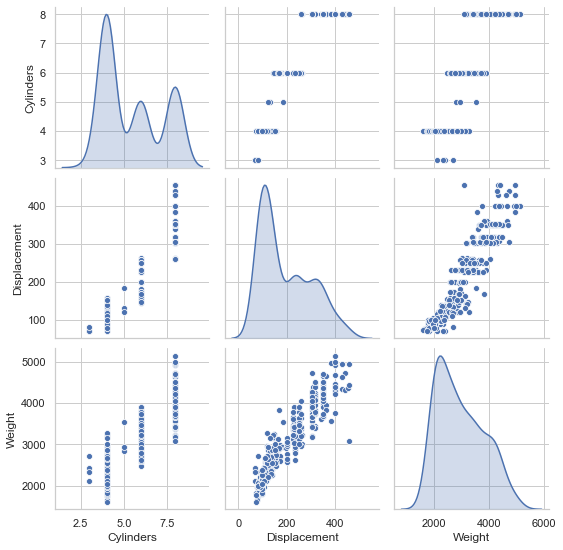

In [21]:
#visualization
sns.pairplot(X_train[["Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [22]:
d = X_train.copy()
f = X_test.copy()

In [23]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,352.0,5.485795,1.706306,3.0,4.00,4.0,8.0,8.0
Displacement,352.0,196.056818,104.561939,70.0,105.00,151.0,302.0,455.0
Horsepower,352.0,104.997159,38.433240,46.0,76.75,95.0,126.0,230.0
Weight,352.0,2982.551136,844.217582,1613.0,2229.50,2822.5,3630.5,5140.0
Acceleration,352.0,15.458523,2.752359,8.0,13.50,15.3,17.0,24.8
Model Year,352.0,76.031250,3.650179,70.0,73.00,76.0,79.0,82.0
Europe,352.0,0.161932,0.368913,0.0,0.00,0.0,0.0,1.0
Japan,352.0,0.198864,0.399713,0.0,0.00,0.0,0.0,1.0
USA,352.0,0.639205,0.480915,0.0,0.00,1.0,1.0,1.0


In [24]:
#Normalization
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(X_train)
normed_test_data = norm(X_test)

In [25]:
# model  building
from tensorflow.keras import layers
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),    
    layers.Dense(30, activation='relu'),    
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [26]:
model = build_model()

In [27]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1950      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 6,781
Trainable params: 6,781
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Train thee model
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 100==0: print('')
        print('.',end='')
#upper call make dotes willing running        
        
EPOCHS = 1000

history = model.fit(
  normed_train_data, Y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [29]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.906326,0.908236,1.906326,9.977769,2.444471,9.977769,995
996,2.079231,1.009650,2.079232,9.832664,2.461061,9.832664,996
997,2.031188,0.958759,2.031188,9.930747,2.498299,9.930747,997
998,2.080508,0.988159,2.080508,9.437780,2.408154,9.437780,998
999,1.757797,0.911917,1.757797,10.634530,2.539695,10.634529,999


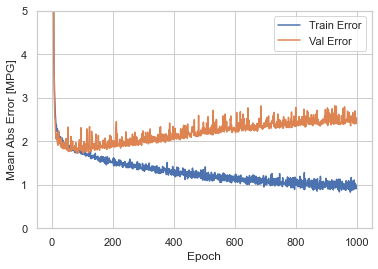

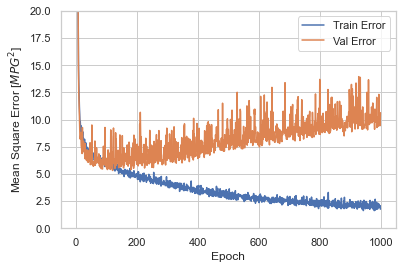

In [30]:
# vis error
import matplotlib.pyplot as plt
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'],hist['mae'],
            label='Train Error')
    plt.plot(hist['epoch'],hist['val_mae'],
            label='Val Error')
    
    plt.legend()
    plt.ylim([0,5])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'],hist['mse'],
            label='Train Error')
    plt.plot(hist['epoch'],hist['val_mse'],
            label='Val Error')
    
    plt.legend()
    plt.ylim([0,20])
    
plot_history(history)


..................................................................

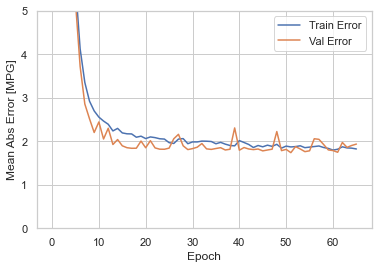

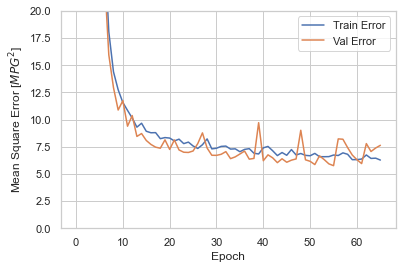

In [31]:
# regularization
#early stoping
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, Y_train, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop,PrintDot()])
plot_history(history)

In [32]:
#check the model in real data.
loss, mae, mse = model.evaluate(normed_test_data, Y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

40/40 - 0s - loss: 2.9394 - mae: 1.2877 - mse: 2.9394
Testing set Mean Abs Error:  1.29 MPG


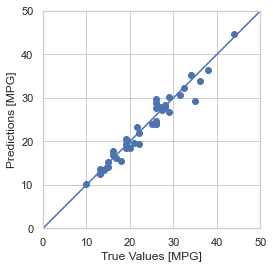

In [33]:
#check prediction
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(Y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


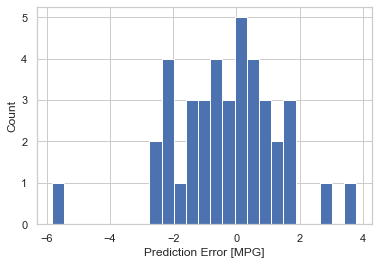

In [34]:
#check error distribution
error = test_predictions - Y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")